In [440]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Modelación Arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller

In [2]:
df_2019=pd.read_csv('flujo-vehicular-por-radares-2019.csv',low_memory=False,encoding='latin1')
df_2020=pd.read_csv('flujo-vehicular-por-radares-2020.csv',low_memory=False,encoding='latin1')
df_2021=pd.read_csv('flujo-vehicular-por-radares-2021.csv',low_memory=False,encoding='latin1')
df_2022=pd.read_csv('flujo-vehicular-por-radares-2022.csv',low_memory=False,encoding='latin1',sep=';')
df_2023=pd.read_csv('flujo-vehicular-por-radares-2023.csv',low_memory=False,encoding='latin1',sep=';')
df_2024=pd.read_csv('flujo-vehicular-por-radares-2024.csv',low_memory=False,encoding='latin1',sep=';')

In [3]:
df_2021=df_2021.rename(columns={'Mes, DÃ­a, AÃ±o de H_Fecha':'fecha','Aut Nombre':'autopista_nombre','H_Cant_Veh':'cantidad'})
df_2022=df_2022.rename(columns={'DÃ­a, Mes, AÃ±o de H_Fecha':'fecha','Aut Nombre':'autopista_nombre','H_Cant_Veh':'cantidad'})
df_2023=df_2023.rename(columns={'ï»¿DÃ­a, Mes, AÃ±o de H_Fecha':'fecha','Aut Nombre':'autopista_nombre','H_Cant_Veh':'cantidad'})
df_2024=df_2024.rename(columns={'ï»¿DÃ­a, Mes, AÃ±o de H_Fecha':'fecha','Aut Nombre':'autopista_nombre','H_Cant_Veh':'cantidad'})

In [4]:
def conversor_time(df,sep,i,j,k):
    # Convertir las fechas al formato correcto y luego a timestamps
    timestamps = []
    for fecha in df.fecha:
        partes = fecha.split(sep)  # Dividir la fecha en día, mes y año
        dia = partes[i].zfill(2)  # Asegurar que el día tenga al menos 2 caracteres
        mes = partes[j].zfill(2)  # Asegurar que el mes tenga al menos 2 caracteres
        año = partes[k] if len(partes[k]) == 4 else "20" + partes[k]  # Asegurar que el año tenga 4 caracteres
        fecha_correcta = f"{año}-{mes}-{dia}"  # Formatear la fecha como YYYY-MM-DD
        timestamp = pd.to_datetime(fecha_correcta)  # Convertir la fecha a un timestamp de Pandas
        timestamps.append(timestamp)
    df.fecha=timestamps

In [5]:
def encontrar_separadores(lista_caracteres):
    separadores = {'-': [], '/': [], ' ': []}

    for indice, caracter in enumerate(lista_caracteres):
        if '-' in caracter:
            separadores['-'].append(indice)
        if '/' in caracter:
            separadores['/'].append(indice)
        if ' ' in caracter:
            separadores[' '].append(indice)

    return separadores

In [6]:
ind_sep=encontrar_separadores(df_2020.fecha)

In [7]:
df_2020.fecha.iloc[ind_sep['/']]=df_2020.fecha.iloc[ind_sep['/']].str.replace('/', '-')
df_2020.fecha.iloc[ind_sep[' ']]=[i.split(' ')[0] for i in df_2020.fecha.iloc[ind_sep[' ']]]

C:\Users\rogel\AppData\Local\Temp\ipykernel_12836\1777439445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020.fecha.iloc[ind_sep['/']]=df_2020.fecha.iloc[ind_sep['/']].str.replace('/', '-')
C:\Users\rogel\AppData\Local\Temp\ipykernel_12836\1777439445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020.fecha.iloc[ind_sep[' ']]=[i.split(' ')[0] for i in df_2020.fecha.iloc[ind_sep[' ']]]


In [8]:
df_2019['fecha']=pd.to_datetime(df_2019['fecha'])
conversor_time(df_2021,'/',0,1,2)
conversor_time(df_2022,'/',0,1,2)
conversor_time(df_2023,'/',0,1,2)
df_2024.dropna(inplace=True)
conversor_time(df_2024,'/',0,1,2)
conversor_time(df_2020,'-',2,1,0)

In [9]:
#df_2019['dia']=[fecha.timetuple().tm_yday for fecha in df_2019['fecha']]

df_2019['semana']=df_2019['fecha'].dt.strftime('%V').astype(int) 
df_2020['semana']=df_2020['fecha'].dt.strftime('%V').astype(int) 
df_2021['semana']=df_2021['fecha'].dt.strftime('%V').astype(int) 
df_2022['semana']=df_2022['fecha'].dt.strftime('%V').astype(int) 
df_2023['semana']=df_2023['fecha'].dt.strftime('%V').astype(int) 
df_2024['semana']=df_2024['fecha'].dt.strftime('%V').astype(int) 

In [513]:
df_2019.to_csv('data_2019.csv')
df_2020.to_csv('data_2020.csv')
df_2021.to_csv('data_2021.csv')
df_2022.to_csv('data_2022.csv')
df_2023.to_csv('data_2023.csv')
df_2024.to_csv('data_2024.csv')

# A partir de aquí se leen los datos

In [441]:
df_2019=pd.read_csv('data_2019.csv',index_col=0,low_memory=False)
df_2020=pd.read_csv('data_2020.csv',index_col=0,low_memory=False)
df_2021=pd.read_csv('data_2021.csv',index_col=0,low_memory=False)
df_2022=pd.read_csv('data_2022.csv',index_col=0,low_memory=False)
df_2023=pd.read_csv('data_2023.csv',index_col=0,low_memory=False)
df_2024=pd.read_csv('data_2024.csv',index_col=0,low_memory=False)

In [455]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219465 entries, 0 to 219464
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fecha             219465 non-null  object 
 1   hora              219465 non-null  int64  
 2   autopista_nombre  219465 non-null  object 
 3   disp_nombre       219465 non-null  object 
 4   disp_ubicacion    219465 non-null  float64
 5   seccion_sentido   219465 non-null  object 
 6   lat               214951 non-null  float64
 7   long              214951 non-null  float64
 8   cantidad          219465 non-null  int64  
 9   semana            219465 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 18.4+ MB


In [456]:
19281+237911+108997+261245+248512+219465

1095411

In [315]:
def sem_group(df):
    df_group=df.groupby(['semana','autopista_nombre'])['cantidad'].sum()
    AU_4= df_group[:, 'AU 4  Lugones']
    AU_5= df_group[:, 'AU 5 Cantilo']
    AU_9= df_group[:, 'AU 9 de Julio Sur']
    AU_D= df_group[:, 'AU Dellepiane']
    return AU_4,AU_5,AU_9,AU_D

In [461]:
AU_4_19,AU_5_19,AU_9_19,AU_D_19=sem_group(df_2019)
AU_4_20,AU_5_20,AU_9_20,AU_D_20=sem_group(df_2020)
AU_4_21,AU_5_21,AU_9_21,AU_D_21=sem_group(df_2021)
AU_4_22,AU_5_22,AU_9_22,AU_D_22=sem_group(df_2022)
AU_4_23,AU_5_23,AU_9_23,AU_D_23=sem_group(df_2023)
AU_4_24,AU_5_24,AU_9_24,AU_D_24=sem_group(df_2024)
df_AU4_20

,Semana,Cantidad
0,1,2384888
1,2,3604261
2,3,3676538
3,4,3872403
4,5,4126483
5,6,3447170
6,7,4321564
7,8,4225990
8,9,2597873
9,10,4550912


In [74]:
df_AU4_19=pd.DataFrame({'Semana':AU_4_19.index,'Cantidad':AU_4_19.values})
df_AU4_20=pd.DataFrame({'Semana':AU_4_20.index,'Cantidad':AU_4_20.values})
df_AU4_21=pd.DataFrame({'Semana':AU_4_21.index,'Cantidad':AU_4_21.values})
df_AU4_22=pd.DataFrame({'Semana':AU_4_22.index,'Cantidad':AU_4_22.values})
df_AU4_23=pd.DataFrame({'Semana':AU_4_23.index,'Cantidad':AU_4_23.values})
df_AU4_24=pd.DataFrame({'Semana':AU_4_24.index,'Cantidad':AU_4_24.values})
df_AU4=pd.concat([df_AU4_19,df_AU4_20,df_AU4_21,df_AU4_22,df_AU4_23,df_AU4_24])
df_AU4.reset_index(drop=True,inplace=True)
# Cambiar los índices para que empiecen desde 1 en lugar de 0
df_AU4.index = range(1, len(df_AU4) + 1)
df_AU4.Semana=df_AU4.index
df_AU4

,Semana,Cantidad
1,1,3677936.0
2,2,3435573.0
3,3,3572759.0
4,4,2961321.0
5,5,1594087.0
...,...,...
230,230,4036628.0
231,231,4433591.0
232,232,4378499.0
233,233,4327559.0


In [99]:
df_AU4.reset_index(drop=True,inplace=True)

In [100]:
# Cambiar los índices para que empiecen desde 1 en lugar de 0
df_AU4.index = range(1, len(df_AU4) + 1)

In [101]:
df_AU4.Semana=df_AU4.index
df_AU4

,Semana,Cantidad
1,1,3677936.0
2,2,3435573.0
3,3,3572759.0
4,4,2961321.0
5,5,1594087.0
...,...,...
230,230,4036628.0
231,231,4433591.0
232,232,4378499.0
233,233,4327559.0


In [7]:
import folium
from folium.plugins import MarkerCluster

# Eliminar duplicados para evitar repetir ubicaciones
df_unique = df_2019.drop_duplicates(subset=['lat', 'long'])

# Crear un mapa centrado en una ubicación inicial (por ejemplo, la media de las ubicaciones)
mapa = folium.Map(location=[df_unique['lat'].mean(), df_unique['long'].mean()], zoom_start=10)

# Crear un clúster de marcadores para agrupar ubicaciones cercanas
marker_cluster = MarkerCluster().add_to(mapa)

# Agregar marcadores al mapa para cada ubicación única
for index, row in df_unique.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(marker_cluster)

# Mostrar el mapa en Jupyter Notebook
display(mapa)


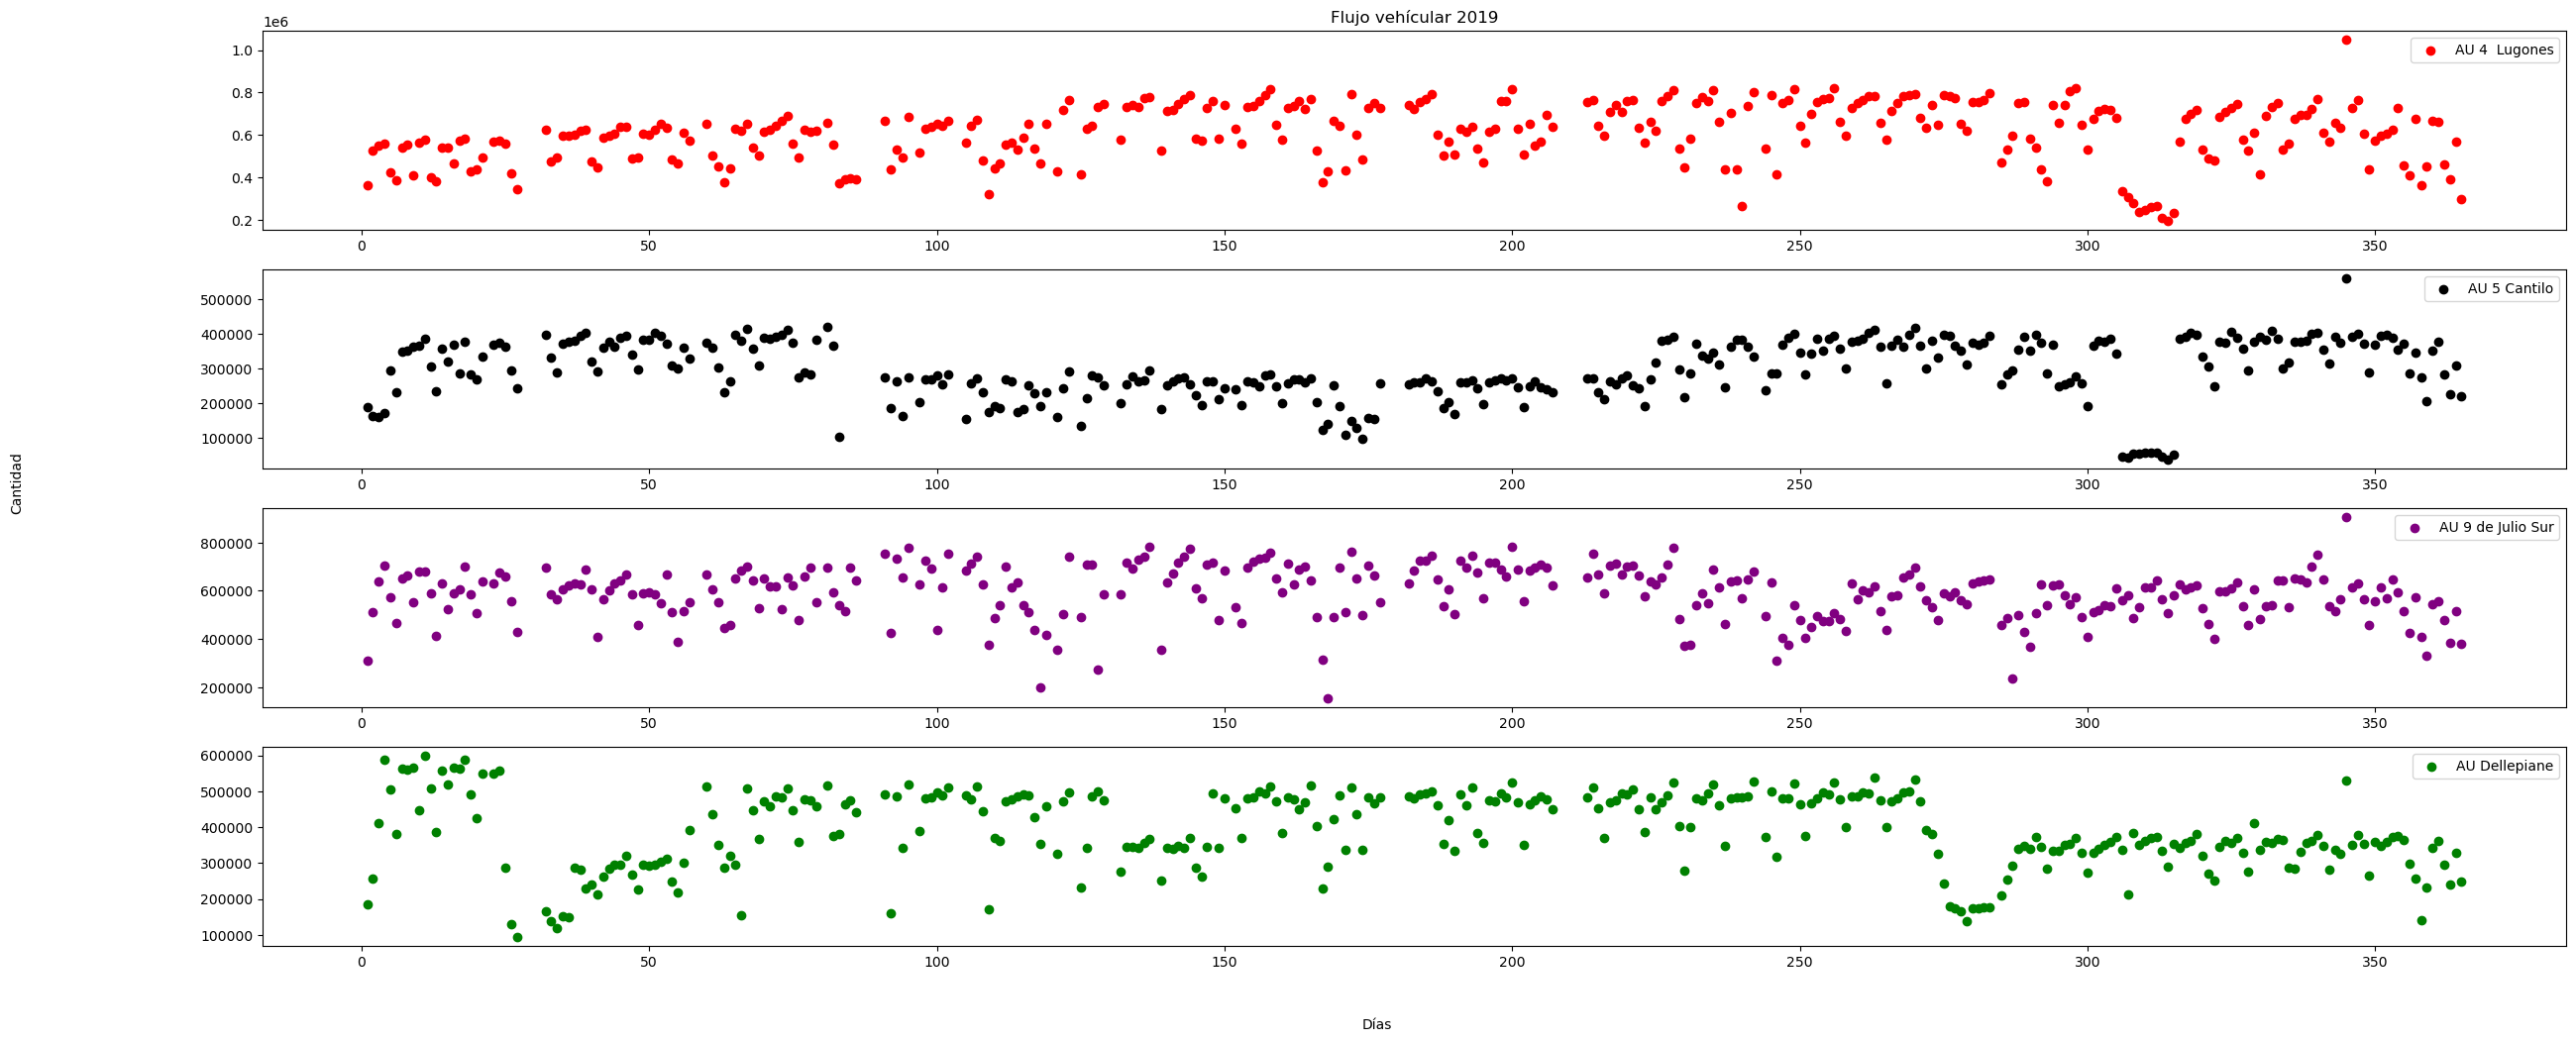

In [31]:
import matplotlib.pyplot as plt

figure,ax=plt.subplots(4,1,figsize=(30,12))
ax[0].scatter(AU_4.index,AU_4.values,label='AU 4  Lugones',color='red')
ax[1].scatter(AU_5.index,AU_5.values,label='AU 5 Cantilo',color='black')
ax[2].scatter(AU_9.index,AU_9.values,label='AU 9 de Julio Sur',color='purple')
ax[3].scatter(AU_D.index,AU_D.values,label='AU Dellepiane',color='green')
# Agregar etiquetas y título
# Nombres compartidos de ejes
figure.text(0.5, 0.04, 'Días', ha='center')
figure.text(0.04, 0.5, 'Cantidad', va='center', rotation='vertical')
ax[0].set_title('Flujo vehícular 2019')

# Agregar leyenda
for i in range(4):
    ax[i].legend()

#plt.xticks(list(range(1,366,1)))

# Mostrar el gráfico
plt.show()

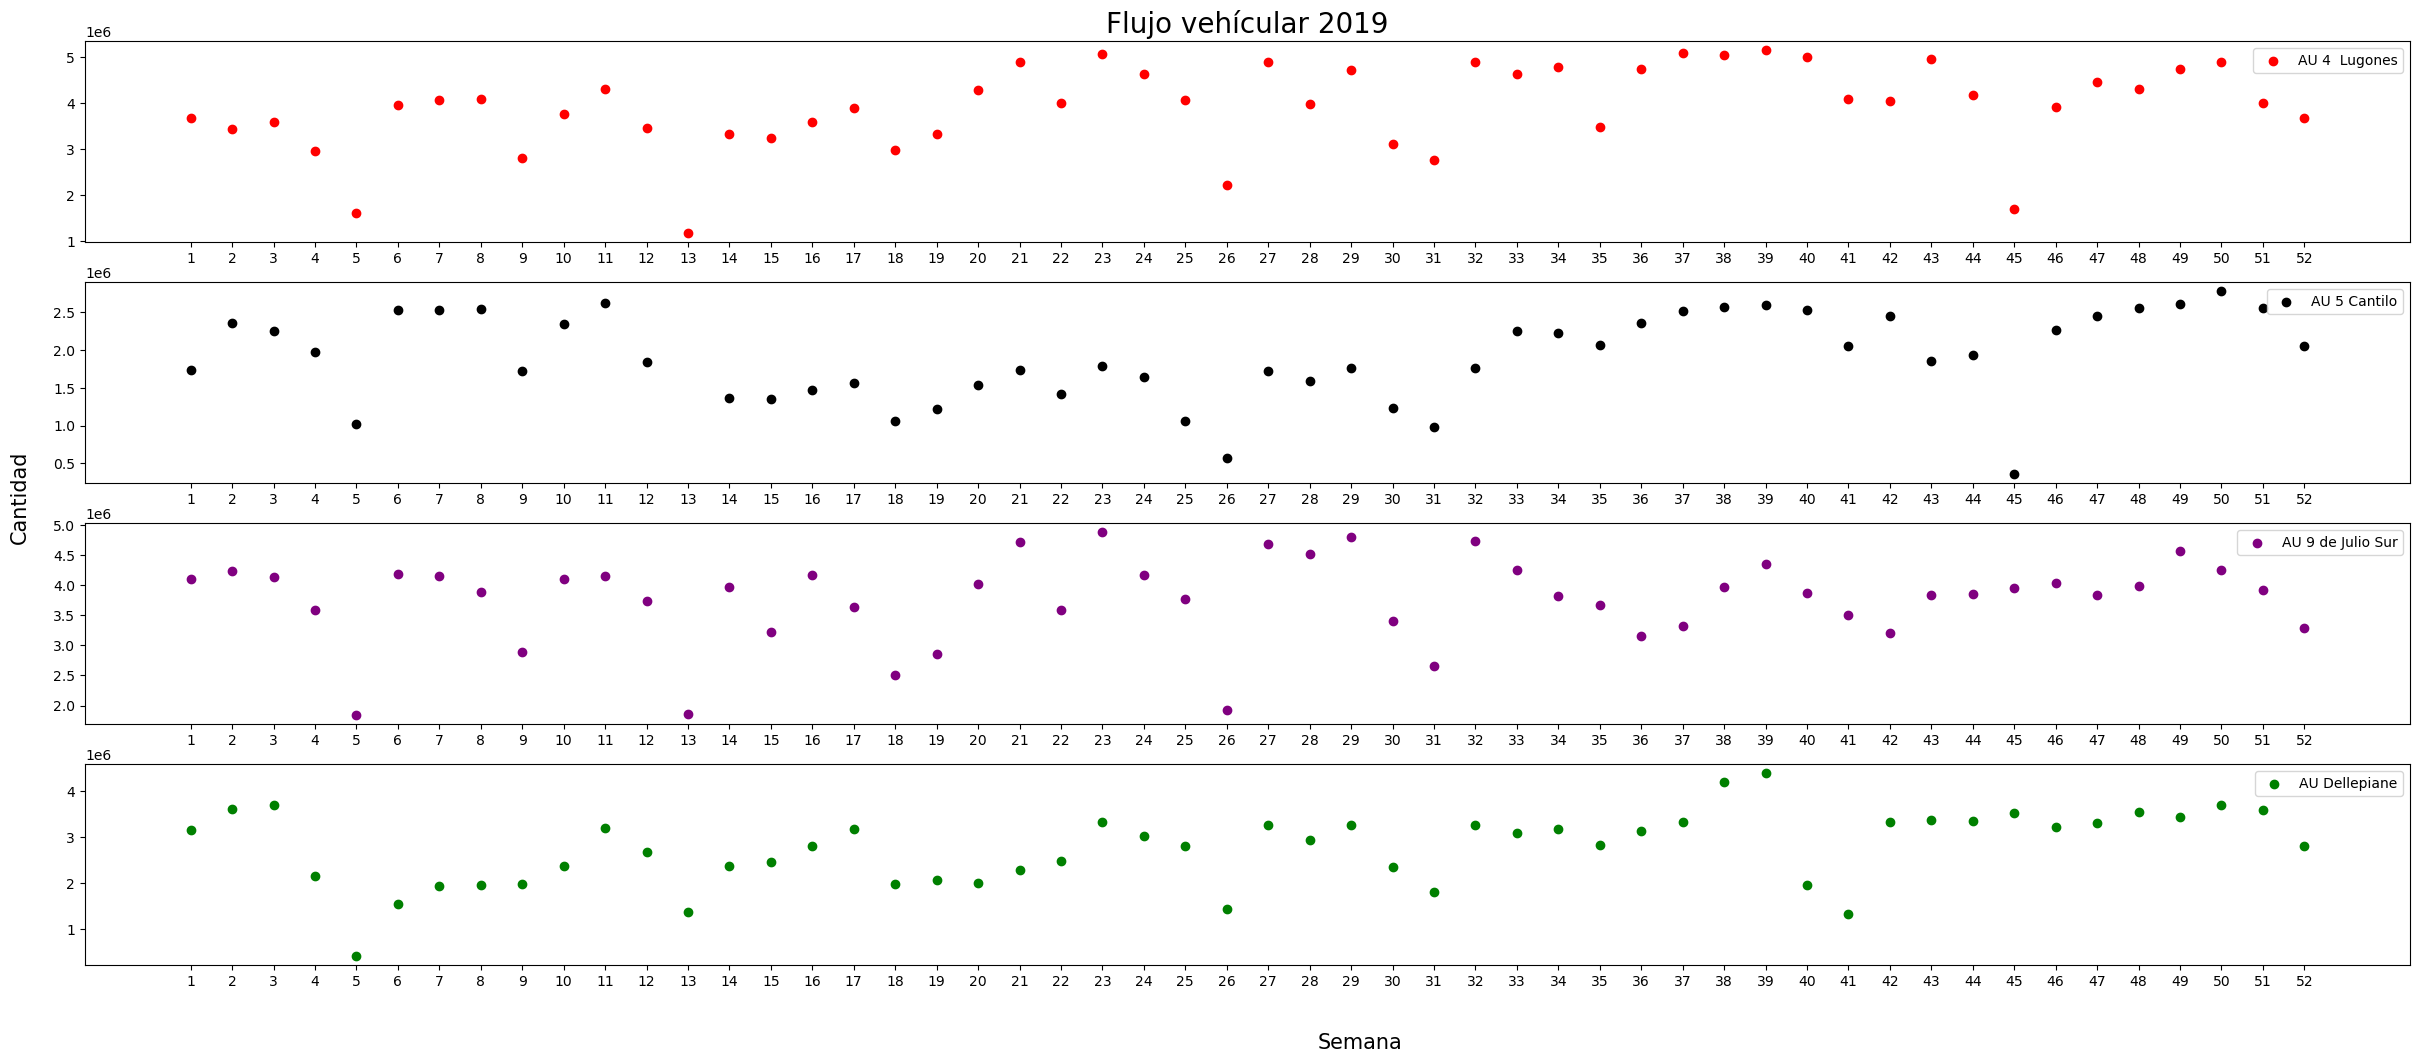

In [85]:
figure,ax=plt.subplots(4,1,figsize=(30,12))
ax[0].scatter(AU_4_w.index,AU_4_w.values,label='AU 4  Lugones',color='red')
ax[1].scatter(AU_5_w.index,AU_5_w.values,label='AU 5 Cantilo',color='black')
ax[2].scatter(AU_9_w.index,AU_9_w.values,label='AU 9 de Julio Sur',color='purple')
ax[3].scatter(AU_D_w.index,AU_D_w.values,label='AU Dellepiane',color='green')
# Agregar etiquetas y título
# Nombres compartidos de ejes
figure.text(0.55, 0.04, 'Semana', ha='center',fontsize=15)
figure.text(0.1, 0.5, 'Cantidad', va='center', rotation='vertical',fontsize=15)
ax[0].set_title('Flujo vehícular 2019',fontsize=20)

# Agregar leyenda
for i in range(4):
    ax[i].legend()

ax[0].set_xticks(list(range(1,53,1)))
ax[1].set_xticks(list(range(1,53,1)))
ax[2].set_xticks(list(range(1,53,1)))
ax[3].set_xticks(list(range(1,53,1)))

# Mostrar el gráfico
plt.show()

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [98]:
X=AU_4_w.index.values.reshape(-1, 1)
y=AU_4_w.values

In [99]:
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

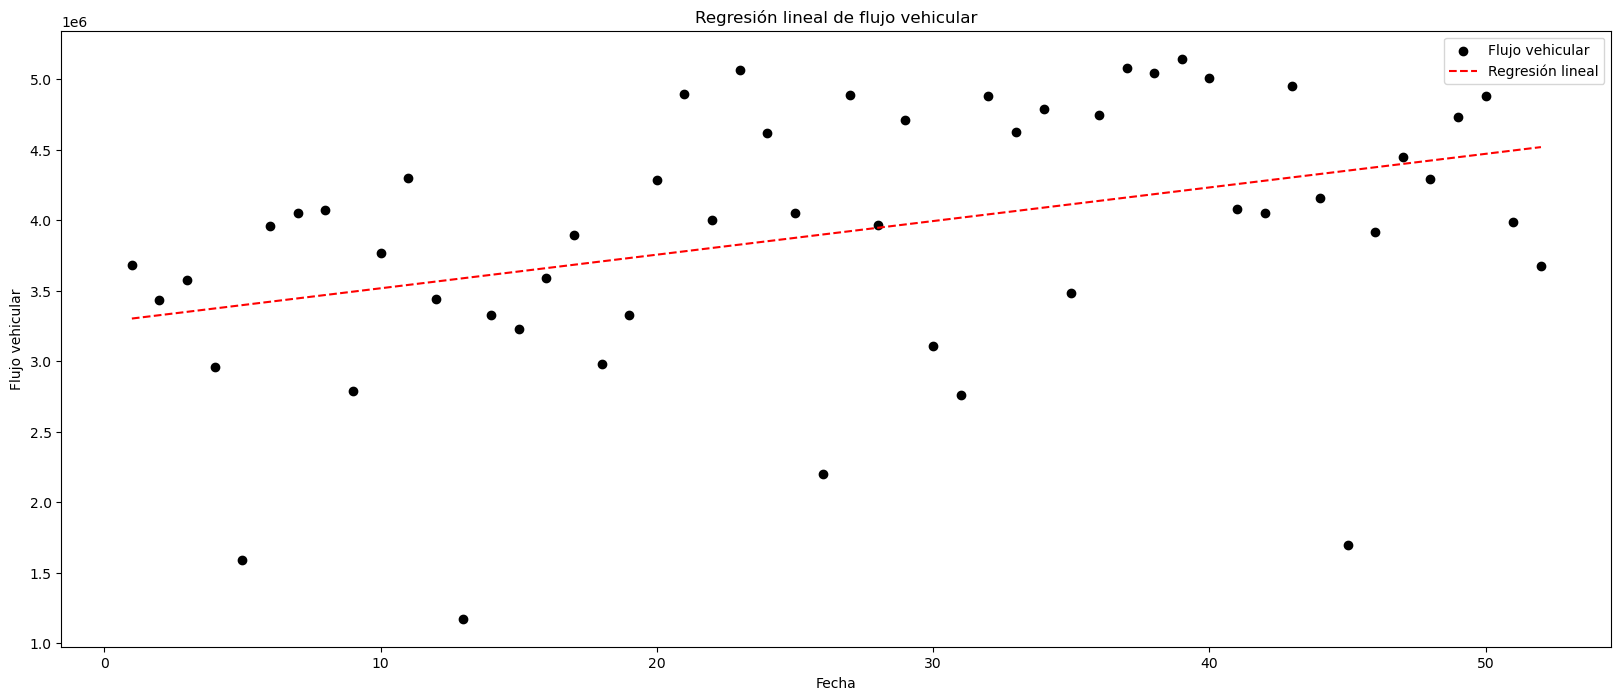

In [103]:
# Visualización del ajuste
plt.figure(figsize=(20, 8))
plt.scatter(AU_4_w.index, AU_4_w.values, label='Flujo vehicular',color='black')
plt.plot(AU_4_w.index, modelo.predict(X), label='Regresión lineal', linestyle='--',color='red')
plt.xlabel('Fecha')
plt.ylabel('Flujo vehicular')
plt.title('Regresión lineal de flujo vehicular')
plt.legend()
plt.show()

In [104]:
# Evaluación del modelo
r_cuadrado = modelo.score(X, y)
print(f"Coeficiente de determinación (R^2): {r_cuadrado}")

Coeficiente de determinación (R^2): 0.15101471409688405


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [9]:
# Dividir los datos en características (X) y el objetivo (y)
X = AU_4_w.index.values.reshape(-1, 1)  # Características: semanas
y = AU_4_w.values  # Objetivo: flujo de tráfico

In [13]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Inicializar y entrenar el modelo de Random Forest Regressor
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [18]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio en el conjunto de prueba:", mse)

Error cuadrático medio en el conjunto de prueba: 856224705876.8164


In [19]:
from sklearn.metrics import r2_score

# Calcular el coeficiente de determinación (R^2) en el conjunto de prueba
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2) en el conjunto de prueba:", r2)

Coeficiente de determinación (R^2) en el conjunto de prueba: 0.011550374444190492


In [321]:
AU_4_19,AU_5_19,AU_9_19,AU_D_19=sem_group(df_2019)
AU_4_20,AU_5_20,AU_9_20,AU_D_20=sem_group(df_2020)
AU_4_21,AU_5_21,AU_9_21,AU_D_21=sem_group(df_2021)
AU_4_22,AU_5_22,AU_9_22,AU_D_22=sem_group(df_2022)
AU_4_23,AU_5_23,AU_9_23,AU_D_23=sem_group(df_2023)
AU_4_24,AU_5_24,AU_9_24,AU_D_24=sem_group(df_2024)

In [474]:

df_AU4_19=pd.DataFrame({'Semana':AU_4_19.index,'Cantidad':AU_4_19.values})
df_AU4_20=pd.DataFrame({'Semana':AU_4_20.index,'Cantidad':AU_4_20.values})
df_AU4_21=pd.DataFrame({'Semana':AU_4_21.index,'Cantidad':AU_4_21.values})
df_AU4_22=pd.DataFrame({'Semana':AU_4_22.index,'Cantidad':AU_4_22.values})
df_AU4_23=pd.DataFrame({'Semana':AU_4_23.index,'Cantidad':AU_4_23.values})
df_AU4_24=pd.DataFrame({'Semana':AU_4_24.index,'Cantidad':AU_4_24.values})
df_AU4=pd.concat([df_AU4_19,df_AU4_20,df_AU4_21,df_AU4_22,df_AU4_23,df_AU4_24])
df_AU4.reset_index(drop=True,inplace=True)
# Cambiar los índices para que empiecen desde 1 en lugar de 0
df_AU4.index = range(1, len(df_AU4) + 1)
df_AU4.Semana=df_AU4.index
df_AU4=df_AU4.iloc[160:233].copy()

df_AU4['Cantidad_pct_change']=df_AU4['Cantidad'].pct_change()
df_AU4.dropna(inplace=True)

In [34]:
import plotly.express as px

In [471]:
fig = px.line(df_AU4, x=df_AU4.Semana, y="Cantidad_pct_change",template = "plotly_dark",
              title="Porcentaje de Cambio AU4 Lugones")
fig.show()

<Axes: ylabel='Density'>

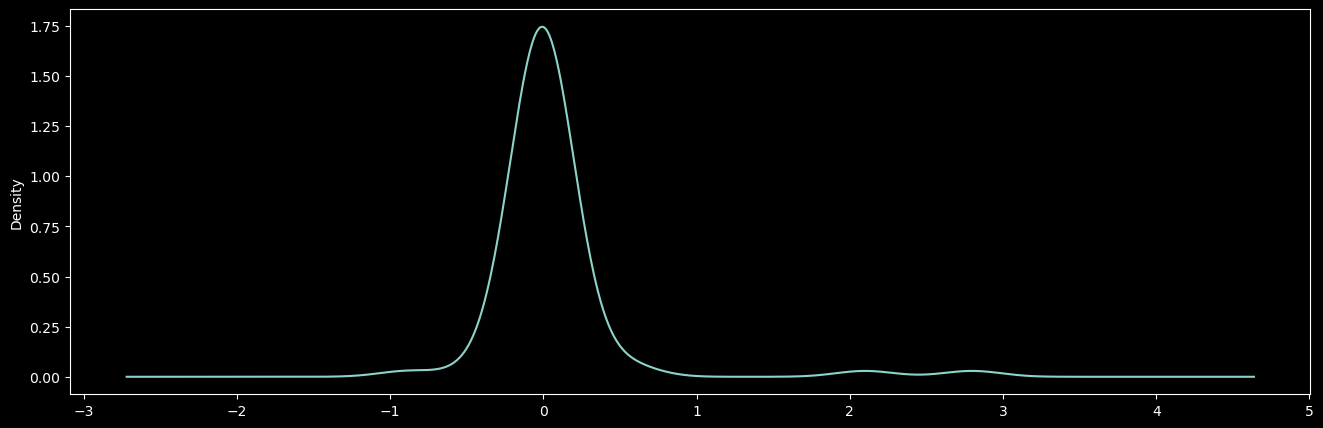

In [472]:
df_AU4['Cantidad_pct_change'].plot(kind='kde',figsize = (16,5))

In [103]:
#df_AU4['Year'] = df_AU4['Día'].apply(lambda x: x.year)
#df_AU4['Month'] = df_AU4['Día'].apply(lambda x: x.month)
#df_AU4['Day'] = df_AU4['Día'].apply(lambda x: x.day)
# Random Forest
# Métrica de Evaluación
# Creando Train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [303]:
def maximizer_r2(df_i,test,size):
    r2_val=[]
    model=[]
    l_test_feature=[]
    l_test_target=[]
    for j in test:
        df=df_i
        for i in range(1,j,1):
            df[f'L{i}'] = df["Cantidad_pct_change"].shift(i)
        df.dropna(inplace=True)
        df= df.set_index("Semana")
        X= df.iloc[:,2:] 
        y = df.iloc[:,1]
        
        Y2 = y
        traintarget_size = int(len(Y2) * (1-size))   # Set split
        train_target, test_target = Y2[0:traintarget_size], Y2[traintarget_size:len(Y2)]
        
        trainfeature_size = int(len(X) * (1-size))
        train_feature, test_feature = X[0:trainfeature_size], X[trainfeature_size:len(X)]
        
        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size,  shuffle=False)
        
        # Creamos el modelo con 500 árboles
        rfr = RandomForestRegressor(n_estimators=500,random_state=123)

        # Entrenamos el modelo
        rfr.fit(train_feature, train_target)
        #rfr.fit(X_train, y_train)

        # Hacemos las predicciones 
        fcst = rfr.predict(test_feature)
        r2=metrics.r2_score(test_target,fcst)
        #fcst = rfr.predict(X_test)
        #r2=metrics.r2_score(y_t)
        r2_val.append(r2)
        model.append(rfr)
        l_test_feature.append(test_feature)
        l_test_target.append(test_target)
    return r2_val,model,l_test_feature,l_test_target
    
        

In [314]:
def evaluacion_metrica(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [475]:
test=list(range(4,13,1))
r2_val,model,l_test_feature,l_test_target=maximizer_r2(df_AU4,test,0.2)

In [476]:
r2_val[5]

0.5439973980020685

In [477]:
rf=model[5]
test_feature=l_test_feature[5]
test_target=l_test_target[5]

In [478]:
# Hacemos las predicciones 
fcst = rf.predict(test_feature)
b=pd.DataFrame({"Actual":test_target, "Random Forest":fcst})
b

,Actual,Random Forest
Semana,,
226,-0.164708,-0.022892
227,0.121769,0.098713
228,-0.104407,-0.036335
229,0.096650,0.083203
230,-0.177645,-0.041883
231,0.098340,0.097799
232,-0.012426,-0.045561
233,-0.011634,-0.042532


In [479]:
fig = px.line(b, x=b.index, y=b.columns,template = "plotly_dark",
              title="Predicción con Modelo Random Forest")
fig.show()

In [480]:
evaluacion_metrica(test_target,fcst)

Evaluation metric results:-
MSE is : 0.005742792404645822
MAE is : 0.05584083664721206
RMSE is : 0.07578121406157216
MAPE is : 99.16927634999584
R2 is : 0.5439973980020685



In [430]:
df_AU5_19=pd.DataFrame({'Semana':AU_5_19.index,'Cantidad':AU_5_19.values})
df_AU5_20=pd.DataFrame({'Semana':AU_5_20.index,'Cantidad':AU_5_20.values})
df_AU5_21=pd.DataFrame({'Semana':AU_5_21.index,'Cantidad':AU_5_21.values})
df_AU5_22=pd.DataFrame({'Semana':AU_5_22.index,'Cantidad':AU_5_22.values})
df_AU5_23=pd.DataFrame({'Semana':AU_5_23.index,'Cantidad':AU_5_23.values})
df_AU5_24=pd.DataFrame({'Semana':AU_5_24.index,'Cantidad':AU_5_24.values})
df_AU5=pd.concat([df_AU5_19,df_AU5_20,df_AU5_21,df_AU5_22,df_AU5_23,df_AU5_24])
df_AU5.reset_index(drop=True,inplace=True)
# Cambiar los índices para que empiecen desde 1 en lugar de 0
df_AU5.index = range(1, len(df_AU5) + 1)
df_AU5.Semana=df_AU5.index
df_AU5=df_AU5.iloc[160:231].copy()
df_AU5['Cantidad_pct_change']=df_AU5['Cantidad'].pct_change()
df_AU5.dropna(inplace=True)

In [431]:
fig = px.line(df_AU5, x=df_AU5.Semana, y="Cantidad_pct_change",template = "plotly_dark",
              title="Porcentaje de Cambio")
fig.show()

<Axes: ylabel='Density'>

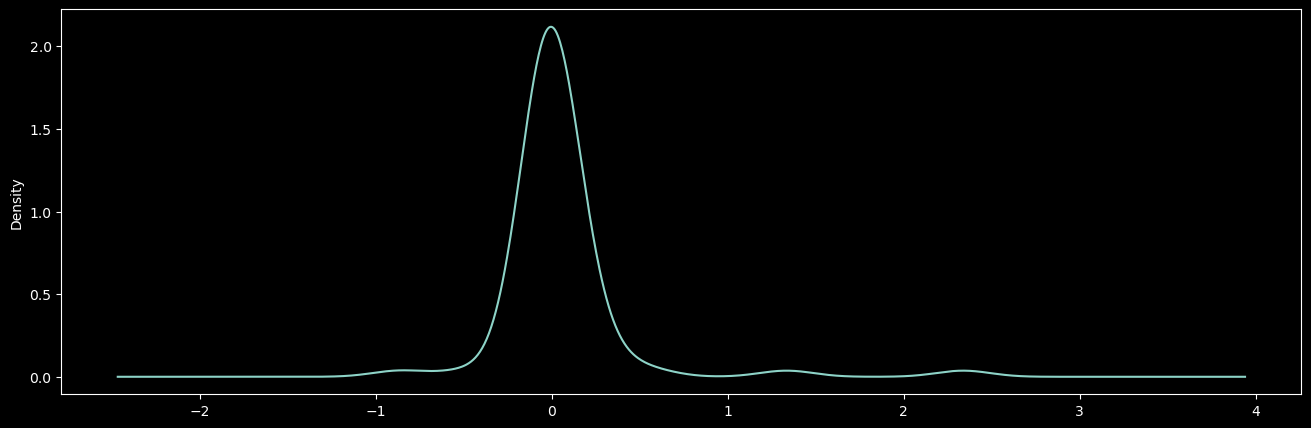

In [432]:
df_AU5['Cantidad_pct_change'].plot(kind='kde',figsize = (16,5))

In [433]:
test=list(range(4,13,1))
r2_val,model,l_test_feature,l_test_target=maximizer_r2(df_AU5,test,0.2)

In [435]:
r2_val[6]

0.2957174345144109

In [436]:
rf=model[6]
test_feature=l_test_feature[6]
test_target=l_test_target[6]

In [437]:
# Hacemos las predicciones 
fcst = rf.predict(test_feature)
b=pd.DataFrame({"Actual":test_target, "Random Forest":fcst})
b

,Actual,Random Forest
Semana,,
226,0.088134,0.117516
227,-0.041877,-0.015824
228,-0.068919,-0.005595
229,-0.083073,0.004779
230,0.114118,0.009826
231,-0.010312,-0.013582


In [438]:
fig = px.line(b, x=b.index, y=b.columns,template = "plotly_dark",
              title="Predicción con Modelo Random Forest")
fig.show()

In [439]:
evaluacion_metrica(test_target,fcst)

Evaluation metric results:-
MSE is : 0.0040262592802923275
MAE is : 0.05236206643762112
RMSE is : 0.06345281144513872
MAPE is : 69.37961925050654
R2 is : 0.2957174345144109



In [363]:
df_AU9_19=pd.DataFrame({'Semana':AU_9_19.index,'Cantidad':AU_9_19.values})
df_AU9_20=pd.DataFrame({'Semana':AU_9_20.index,'Cantidad':AU_9_20.values})
df_AU9_21=pd.DataFrame({'Semana':AU_9_21.index,'Cantidad':AU_9_21.values})
df_AU9_22=pd.DataFrame({'Semana':AU_9_22.index,'Cantidad':AU_9_22.values})
df_AU9_23=pd.DataFrame({'Semana':AU_9_23.index,'Cantidad':AU_9_23.values})
df_AU9_24=pd.DataFrame({'Semana':AU_9_24.index,'Cantidad':AU_9_24.values})
df_AU9=pd.concat([df_AU9_19,df_AU9_20,df_AU9_21,df_AU9_22,df_AU9_23,df_AU9_24])
df_AU9.reset_index(drop=True,inplace=True)
# Cambiar los índices para que empiecen desde 1 en lugar de 0
df_AU9.index = range(1, len(df_AU9) + 1)
df_AU9.Semana=df_AU9.index
df_AU9=df_AU9.iloc[180:233].copy()
df_AU9['Cantidad_pct_change']=df_AU9['Cantidad'].pct_change()
df_AU9.dropna(inplace=True)

In [354]:
fig = px.line(df_AU9, x=df_AU9.Semana, y="Cantidad_pct_change",template = "plotly_dark",
              title="Porcentaje de Cambio")
fig.show()

<Axes: ylabel='Density'>

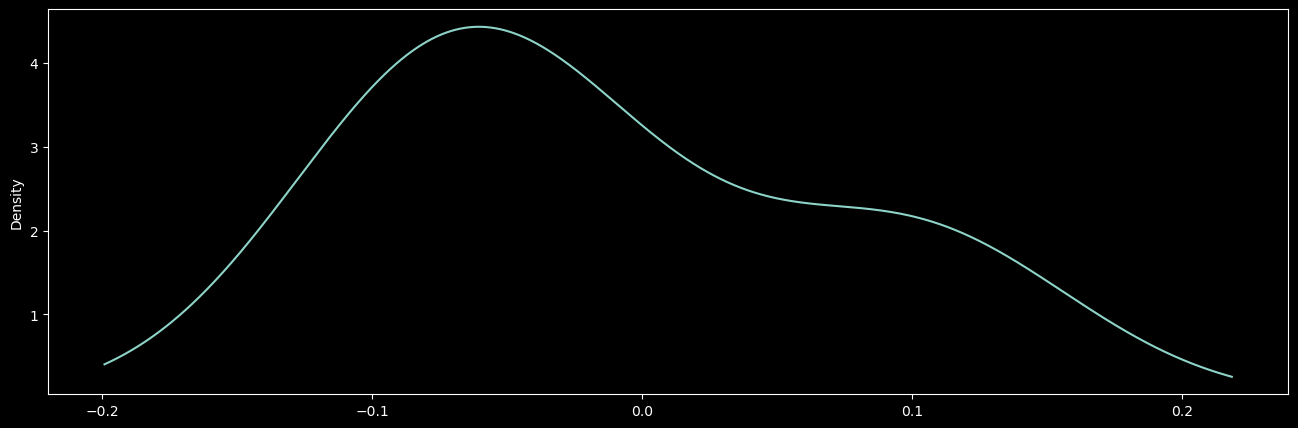

In [355]:
df_AU5['Cantidad_pct_change'].plot(kind='kde',figsize = (16,5))

In [364]:
test=list(range(4,11,1))
r2_val,model,l_test_feature,l_test_target=maximizer_r2(df_AU9,test,0.2)

In [366]:
r2_val[1]

0.340392302941245

In [367]:
rf=model[1]
test_feature=l_test_feature[1]
test_target=l_test_target[1]

In [368]:
# Hacemos las predicciones 
fcst = rf.predict(test_feature)
b=pd.DataFrame({"Actual":test_target, "Random Forest":fcst})
b

,Actual,Random Forest
Semana,,
225,0.027955,-0.037888
226,-0.012543,-0.043773
227,-0.005039,-0.021797
228,-0.039087,-0.024867
229,0.050077,-0.022070
230,-0.212196,-0.047678
231,0.119311,0.172022
232,0.008538,0.037408
233,-0.020239,-0.043072


In [369]:
fig = px.line(b, x=b.index, y=b.columns,template = "plotly_dark",
              title="Predicción con Modelo Random Forest")
fig.show()

In [370]:
evaluacion_metrica(test_target,fcst)

Evaluation metric results:-
MSE is : 0.004688708708789183
MAE is : 0.052125630994489365
RMSE is : 0.06847414628010474
MAPE is : 174.46342567875917
R2 is : 0.340392302941245



In [411]:
df_AUD_19=pd.DataFrame({'Semana':AU_D_19.index,'Cantidad':AU_D_19.values})
df_AUD_20=pd.DataFrame({'Semana':AU_D_20.index,'Cantidad':AU_D_20.values})
df_AUD_21=pd.DataFrame({'Semana':AU_D_21.index,'Cantidad':AU_D_21.values})
df_AUD_22=pd.DataFrame({'Semana':AU_D_22.index,'Cantidad':AU_D_22.values})
df_AUD_23=pd.DataFrame({'Semana':AU_D_23.index,'Cantidad':AU_D_23.values})
df_AUD_24=pd.DataFrame({'Semana':AU_D_24.index,'Cantidad':AU_D_24.values})
df_AUD=pd.concat([df_AUD_19,df_AUD_20,df_AUD_21,df_AUD_22,df_AUD_23,df_AUD_24])
df_AUD.reset_index(drop=True,inplace=True)
# Cambiar los índices para que empiecen desde 1 en lugar de 0
df_AUD.index = range(1, len(df_AUD) + 1)
df_AUD.Semana=df_AUD.index
df_AUD=df_AUD.iloc[130:233].copy()
df_AUD['Cantidad_pct_change']=df_AUD['Cantidad'].pct_change()
df_AUD.dropna(inplace=True)

In [412]:
fig = px.line(df_AUD, x=df_AUD.Semana, y="Cantidad_pct_change",template = "plotly_dark",
              title="Porcentaje de Cambio")
fig.show()

<Axes: ylabel='Density'>

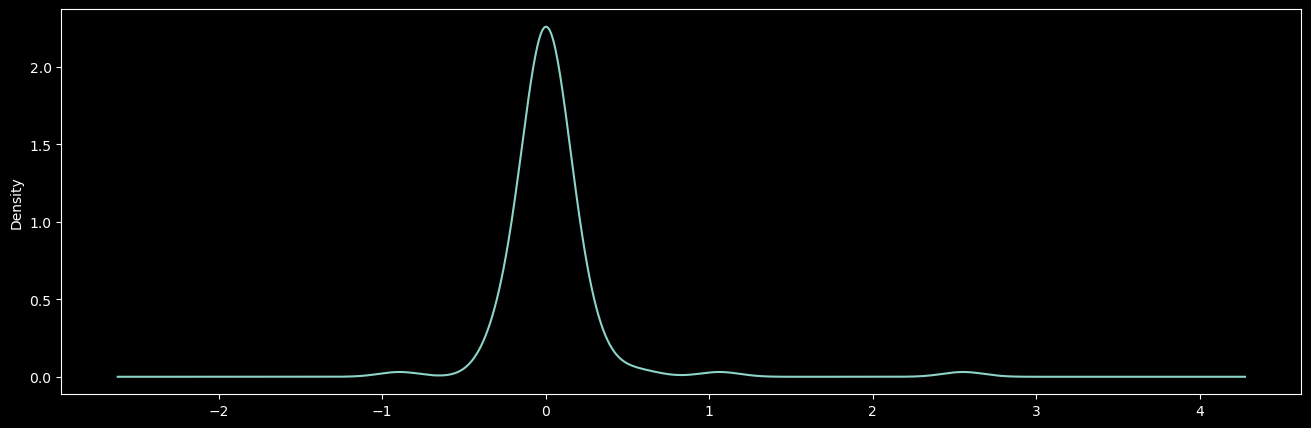

In [401]:
df_AUD['Cantidad_pct_change'].plot(kind='kde',figsize = (16,5))

In [413]:
test=list(range(4,15,1))
r2_val,model,l_test_feature,l_test_target=maximizer_r2(df_AUD,test,0.2)

In [415]:
r2_val[-1]

0.552855178259376

In [416]:
rf=model[-1]
test_feature=l_test_feature[-1]
test_target=l_test_target[-1]

In [417]:
# Hacemos las predicciones 
fcst = rf.predict(test_feature)
b=pd.DataFrame({"Actual":test_target, "Random Forest":fcst})
b

,Actual,Random Forest
Semana,,
231,0.059109,0.038151
232,-0.017079,0.007593
233,-0.004076,0.016840


In [418]:
fig = px.line(b, x=b.index, y=b.columns,template = "plotly_dark",
              title="Predicción con Modelo Random Forest")
fig.show()

In [419]:
evaluacion_metrica(test_target,fcst)

Evaluation metric results:-
MSE is : 0.0004951403361308983
MAE is : 0.022181943819150576
RMSE is : 0.022251749057790902
MAPE is : 231.02481083188215
R2 is : 0.552855178259376



In [4]:
gg=df_2019.groupby('fecha')['cantidad'].sum()
df_d=pd.DataFrame({'Día':gg.index,'Cantidad':gg.values})
df_d

,Día,Cantidad
0,2019-01-01,1049372
1,2019-01-02,1458463
2,2019-01-03,1761325
3,2019-01-04,2023810
4,2019-01-05,1795952
...,...,...
328,2019-12-27,2118203
329,2019-12-28,1652293
330,2019-12-29,1353827
331,2019-12-30,1859709


In [5]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Día       333 non-null    object
 1   Cantidad  333 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.3+ KB


In [6]:
df_d=df_d.set_index('Día')
df_d

,Cantidad
Día,
2019-01-01,1049372
2019-01-02,1458463
2019-01-03,1761325
2019-01-04,2023810
2019-01-05,1795952
...,...
2019-12-27,2118203
2019-12-28,1652293
2019-12-29,1353827


In [9]:
fig = px.line(df_d, x=df_d.index, y="Cantidad",template = "plotly_dark",
              title="Precio de Venta Furniture")
fig.show()

In [28]:
df_diff=df_d.copy()

df_diff['Cantidad_diff']=df_diff['Cantidad'].diff()

df_diff.dropna(inplace=True)

#df_diff.index = pd.DatetimeIndex(df_diff.index).to_period('D')

df_diff.head()

,Cantidad,Cantidad_diff
Día,,
2019-01-02,1458463,409091.0
2019-01-03,1761325,302862.0
2019-01-04,2023810,262485.0
2019-01-05,1795952,-227858.0
2019-01-06,1468427,-327525.0


In [29]:
# Verificar si los índices son de tipo DatetimeIndex y tienen una frecuencia definida
if not isinstance(df_diff.index, pd.DatetimeIndex) or df_diff.index.freq is None:
    # Establecer una frecuencia diaria
    df_diff.index = pd.DatetimeIndex(df_diff.index)

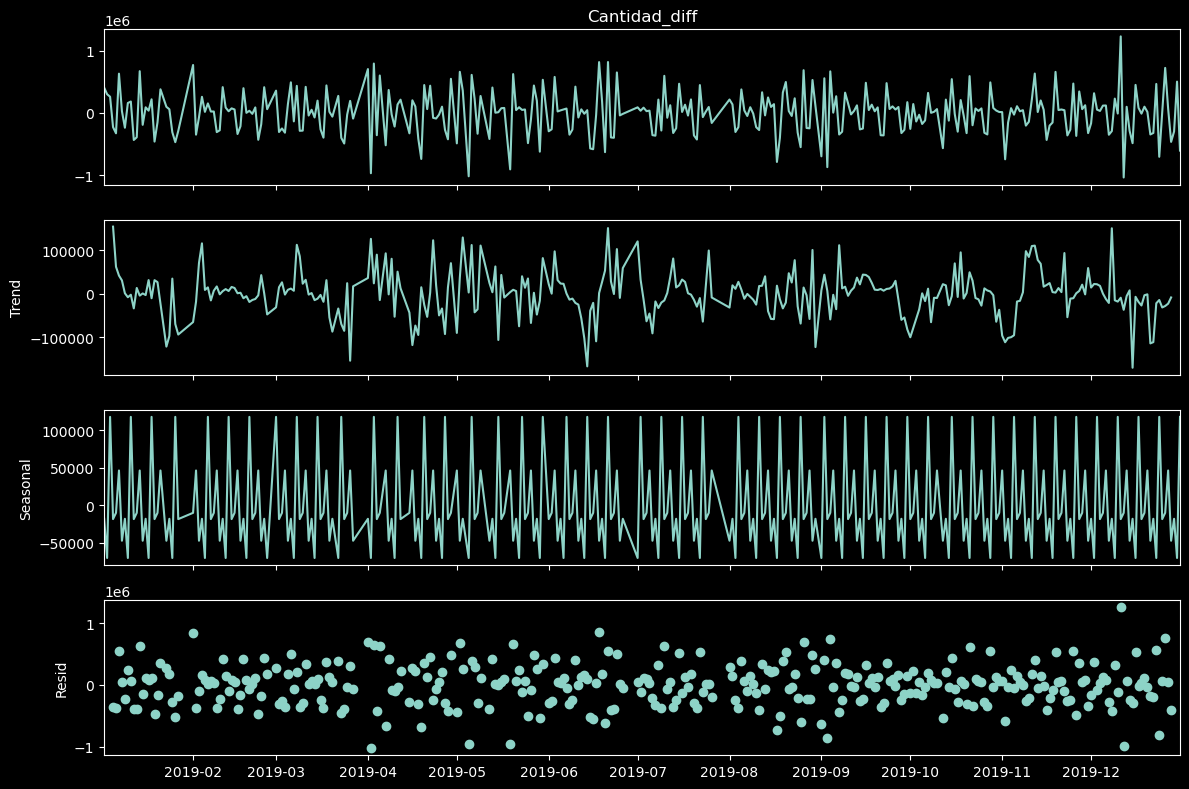

In [30]:
plt.rcParams["figure.figsize"] = (12, 8)
a = seasonal_decompose(df_diff["Cantidad_diff"], model = "add",period=7)
a.plot();

In [58]:
# Supongamos que queremos predecir la cantidad para el último día
train_data = df_d['Cantidad'][:-1]
test_data = df_d['Cantidad'][-1:]


In [59]:
from statsmodels.tsa.arima.model import ARIMA

# Definir el modelo ARIMA con los parámetros p, d, q
p = 1
d = 1
q = 1

# Ajustar el modelo ARIMA a los datos de entrenamiento
modelo_arima = ARIMA(train_data, order=(p, d, q))
modelo_arima_entrenado = modelo_arima.fit()


c:\Users\rogel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\rogel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\rogel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [62]:
# Predicción para el último día
prediccion = modelo_arima_entrenado.forecast(steps=1)
print("Predicción para el último día:", prediccion)


Predicción para el último día: 332    1.914125e+06
dtype: float64


c:\Users\rogel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



c:\Users\rogel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\rogel\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



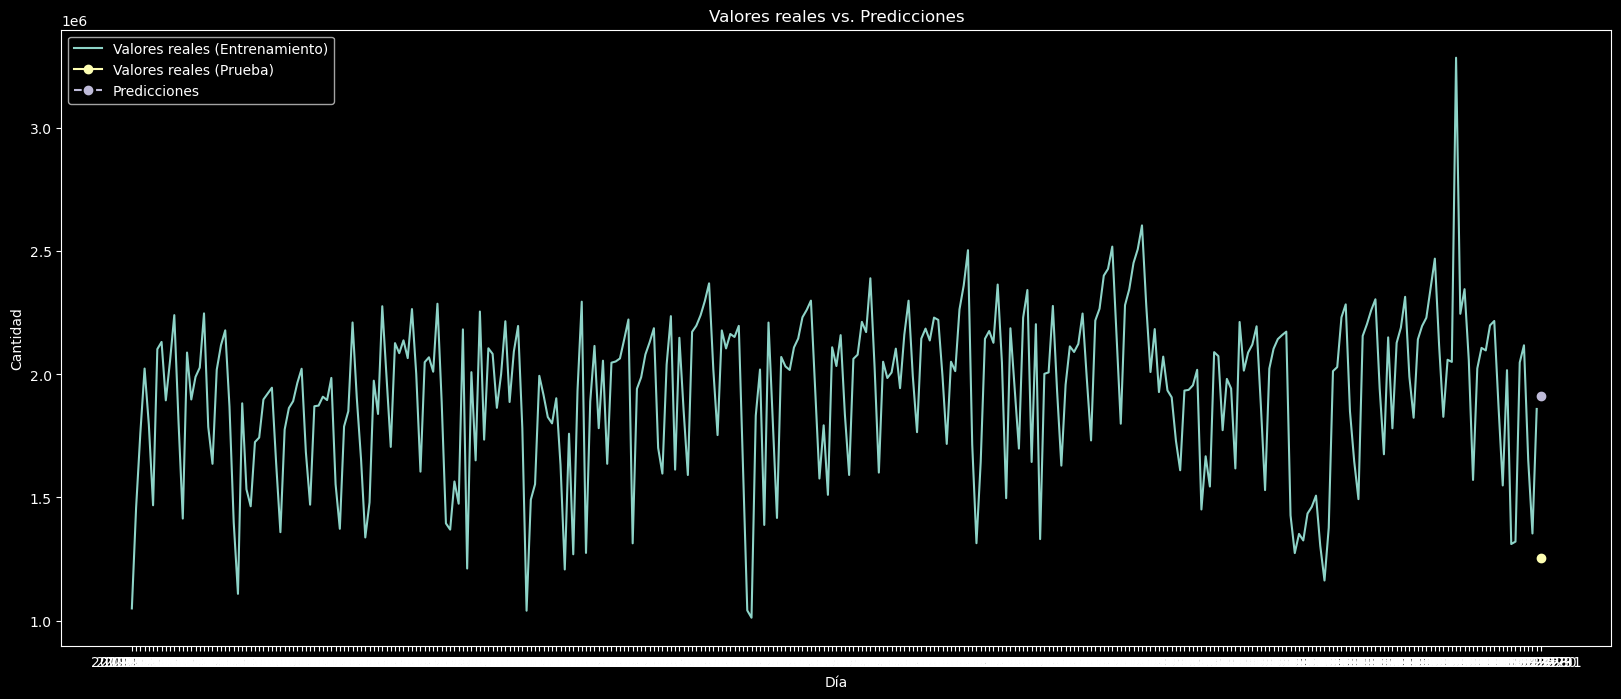

In [63]:
import matplotlib.pyplot as plt

# Realizar la predicción para el último día
prediccion = modelo_arima_entrenado.forecast(steps=1)

# Combinar los datos de prueba (valores reales) con las predicciones en un DataFrame
df_prediccion = pd.DataFrame({'Día': test_data.index, 'Cantidad_real': test_data.values, 'Cantidad_predicha': [prediccion]})
df_prediccion.set_index('Día', inplace=True)

# Graficar los valores reales y las predicciones
plt.plot(train_data.index, train_data.values, label='Valores reales (Entrenamiento)')
plt.plot(df_prediccion.index, df_prediccion['Cantidad_real'], marker='o', linestyle='-', label='Valores reales (Prueba)')
plt.plot(df_prediccion.index, df_prediccion['Cantidad_predicha'], marker='o', linestyle='--', label='Predicciones')
plt.title('Valores reales vs. Predicciones')
plt.xlabel('Día')
plt.ylabel('Cantidad')
plt.legend()
plt.show()


c:\Users\rogel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\rogel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



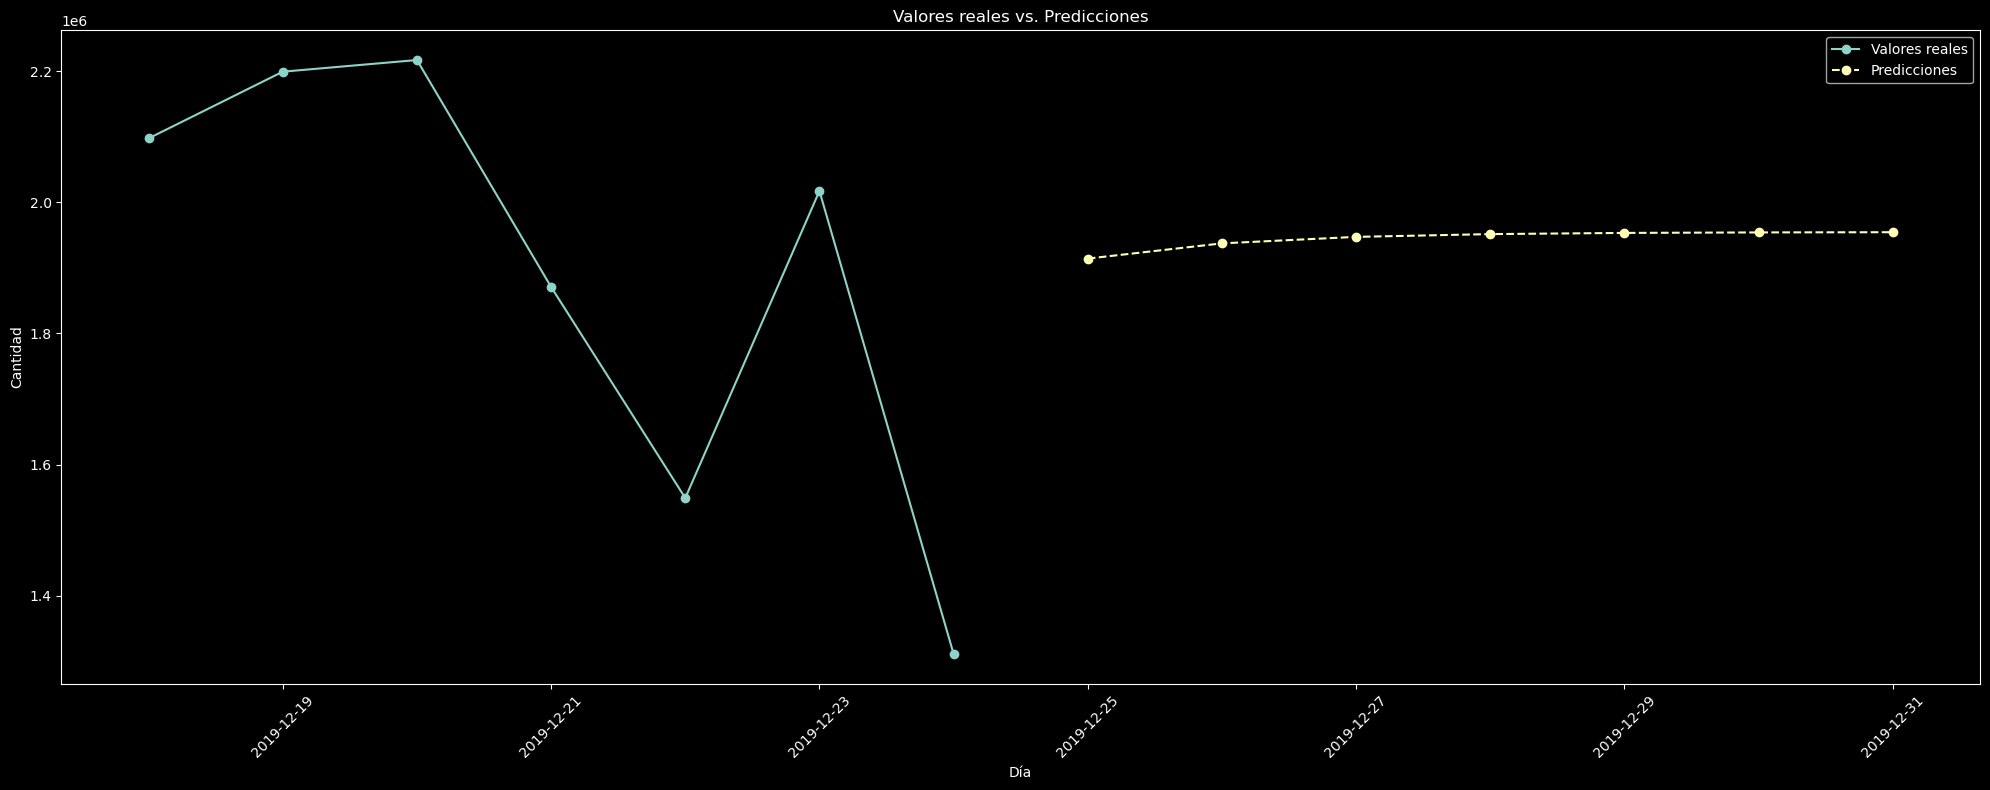

In [66]:
import pandas as pd

# Asegurémonos de que el índice sea de tipo DatetimeIndex
df_d.index = pd.to_datetime(df_d.index)

# Realizar la predicción para 7 días
dias_a_predecir = 7
predicciones = modelo_arima_entrenado.forecast(steps=dias_a_predecir)

# Seleccionar los últimos 7 días de datos reales para comparar
valores_reales = df_d['Cantidad'][-(dias_a_predecir+7):-7]

# Crear un DataFrame para almacenar las predicciones
fechas_prediccion = pd.date_range(start=valores_reales.index[-1] + pd.Timedelta(days=1), periods=dias_a_predecir, freq='D')
df_predicciones = pd.DataFrame({'Fecha': fechas_prediccion, 'Cantidad_predicha': predicciones})

# Graficar los valores reales y las predicciones
plt.plot(valores_reales.index, valores_reales.values, marker='o', linestyle='-', label='Valores reales')
plt.plot(df_predicciones['Fecha'], df_predicciones['Cantidad_predicha'], marker='o', linestyle='--', label='Predicciones')
plt.title('Valores reales vs. Predicciones')
plt.xlabel('Día')
plt.ylabel('Cantidad')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

